# Evaluation examples

In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload 2
simulation = Simulator(n_nodes = 50, n_edges = 10, n_clusters = 5, seed = 12343, sample_size = 100)
cluster_dag = simulation.run()

2023-07-29 19:07:50,998 - c:\Users\scroo\MLProjects\masterthesis\env\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [19]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X34', 'X41', 'X39', 'X36', 'X45', 'X12', 'X42', 'X17', 'X20', 'X29', 'X31', 'X1', 'X4', 'X5', 'X7', 'X8', 'X9'], 'C2': ['X13', 'X16', 'X18', 'X19', 'X21', 'X22', 'X23', 'X24', 'X27'], 'C3': ['X28'], 'C4': ['X30', 'X32', 'X33', 'X37', 'X38', 'X40'], 'C5': ['X43', 'X44', 'X47', 'X48', 'X49', 'X2', 'X6', 'X10', 'X26', 'X11', 'X25', 'X14', 'X15', 'X46', 'X50', 'X35', 'X3']}
[('C1', 'C5')]


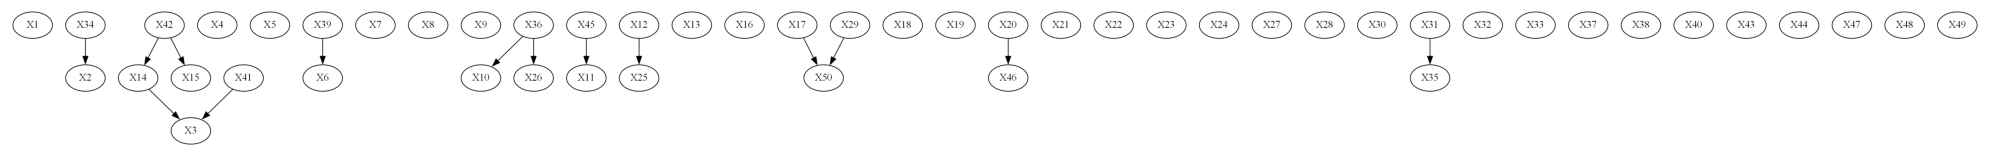

In [20]:
cluster_dag.true_dag.draw_pydot_graph()

In [21]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [22]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

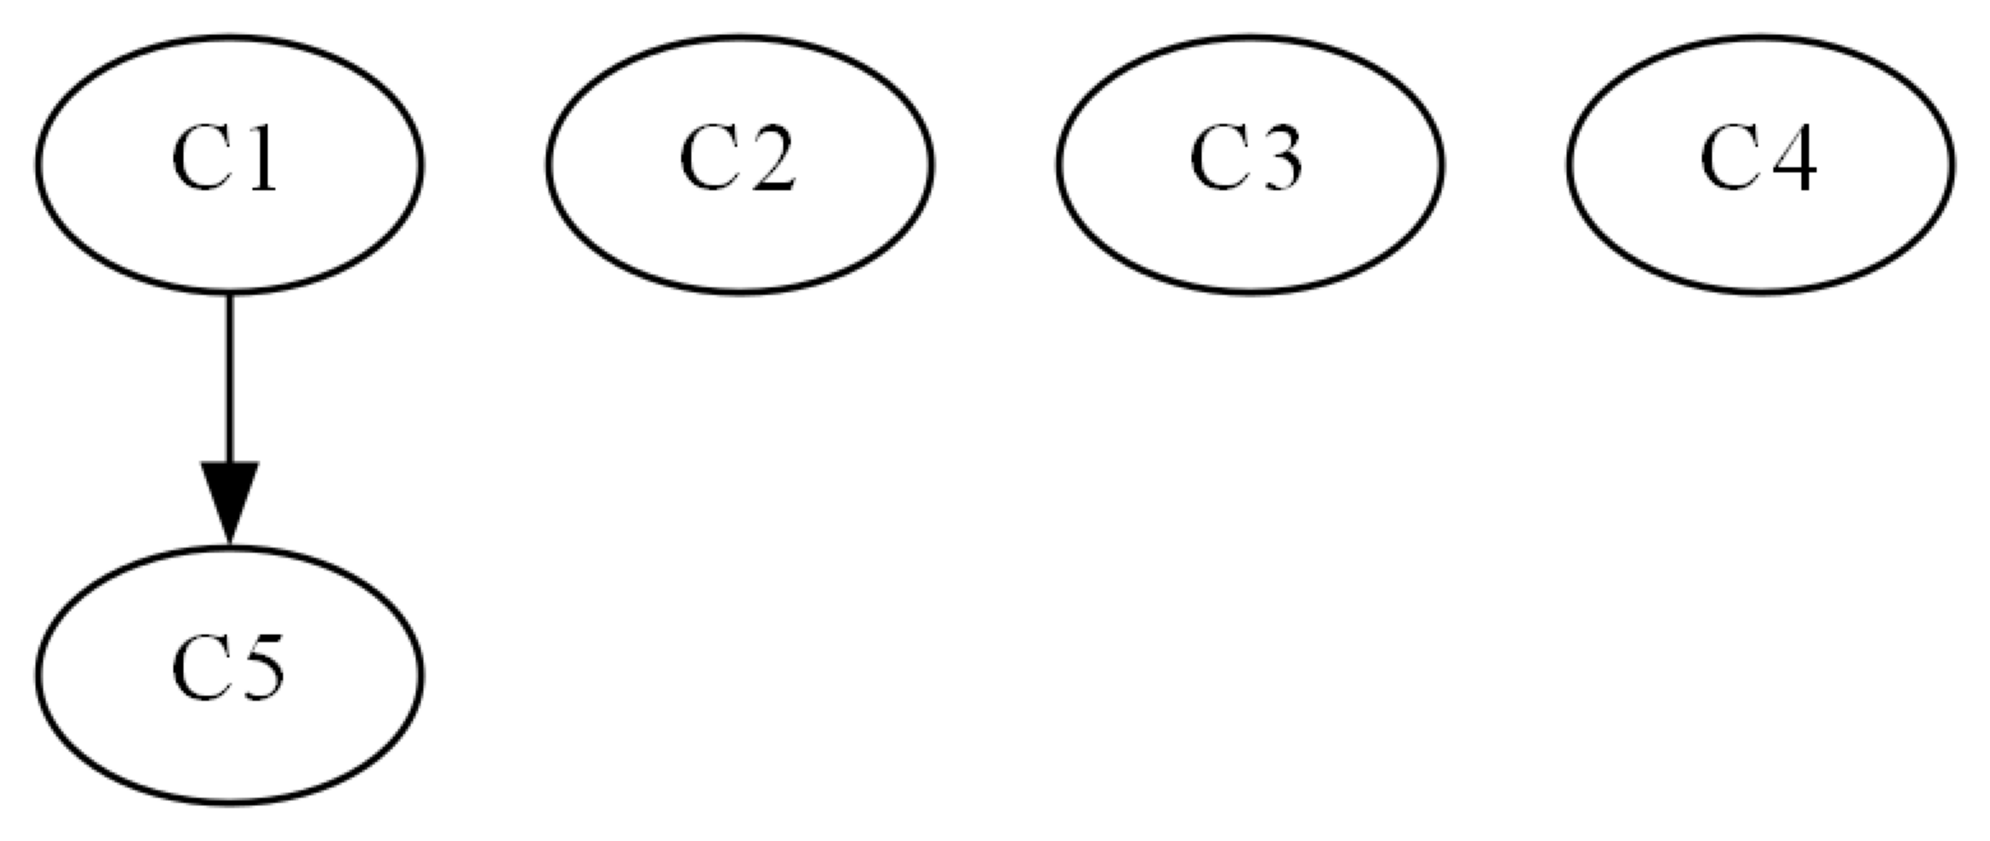

In [23]:
cluster_dag.draw_cluster_graph()

In [34]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

In:     C5, Depth=0, working on node 49: 100%|██████████| 17/17 [00:00<00:00, 629.32it/s, duration: 0.18sec]


Duration of algorithm was 3.11sec


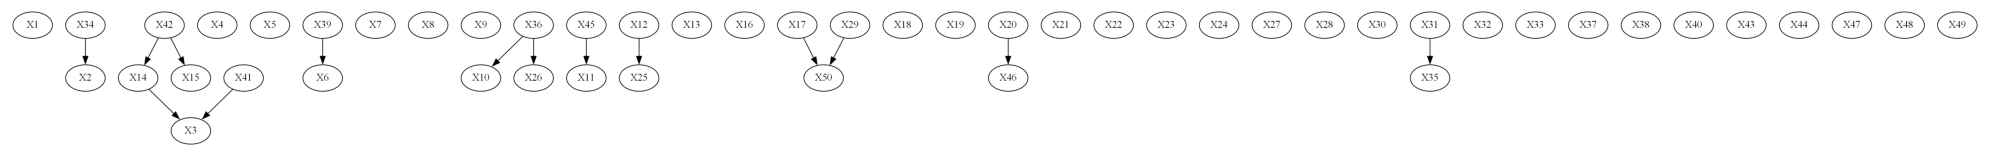

In [25]:
cluster_dag.true_dag.draw_pydot_graph()

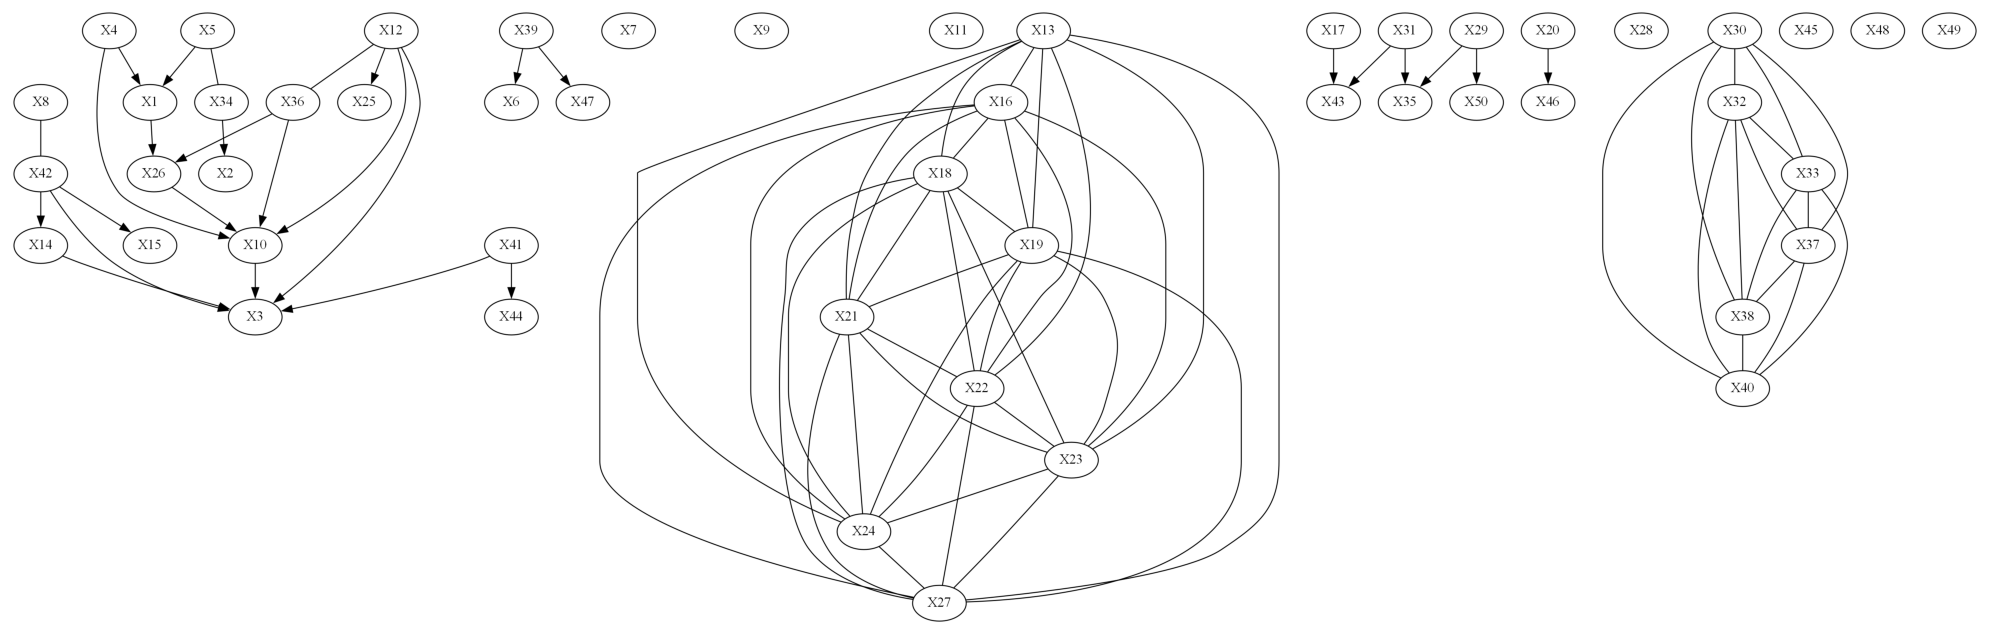

In [26]:
est_graph.draw_pydot_graph()

In [27]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 12, 'false_positive': 68, 'false_negative': 2, 'true_negative': 1143, 'precision': 0.15, 'recall': 0.8571428571428571}
Arrow confusion:  {'true_positive': 12.0, 'false_positive': 14.0, 'false_negative': 2.0, 'true_negative': 2472.0, 'precision': 0.46153846153846156, 'recall': 0.8571428571428571, 'true_positive_ce': 12.0, 'false_positive_ce': 0.0, 'false_negative_ce': 0.0, 'true_negative_ce': 2488.0, 'precision_ce': 1.0, 'recall_ce': 1.0}
SHD:  70


In [28]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.05, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)

Depth=3, working on node 49: 100%|██████████| 50/50 [00:00<00:00, 1889.28it/s]


Adjacency confusion:  {'true_positive': 11, 'false_positive': 18, 'false_negative': 3, 'true_negative': 1193, 'precision': 0.3793103448275862, 'recall': 0.7857142857142857}
Arrow confusion:  {'true_positive': 4.0, 'false_positive': 18.0, 'false_negative': 10.0, 'true_negative': 2468.0, 'precision': 0.18181818181818182, 'recall': 0.2857142857142857, 'true_positive_ce': 4.0, 'false_positive_ce': 1.0, 'false_negative_ce': 7.0, 'true_negative_ce': 2488.0, 'precision_ce': 0.8, 'recall_ce': 0.36363636363636365}
SHD:  22


In [29]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

False
False
False


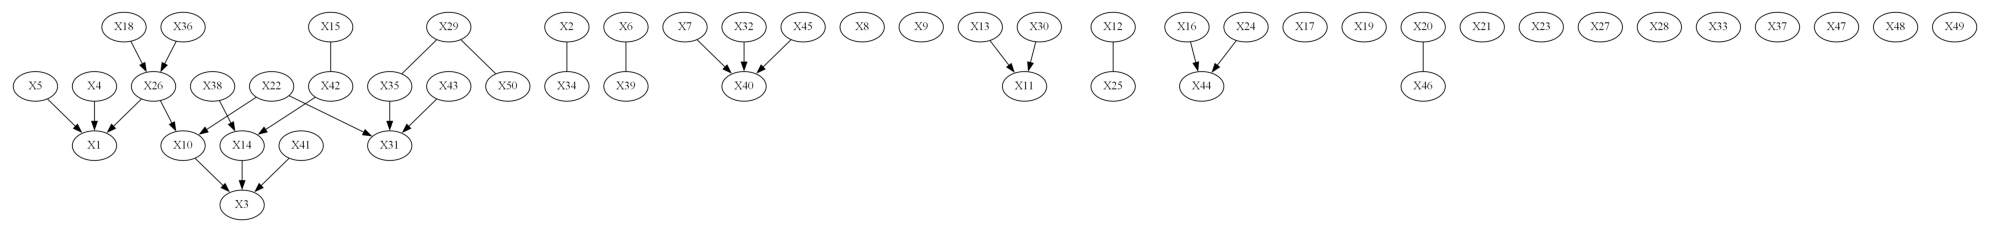

In [30]:
causallearn_cg.draw_pydot_graph()

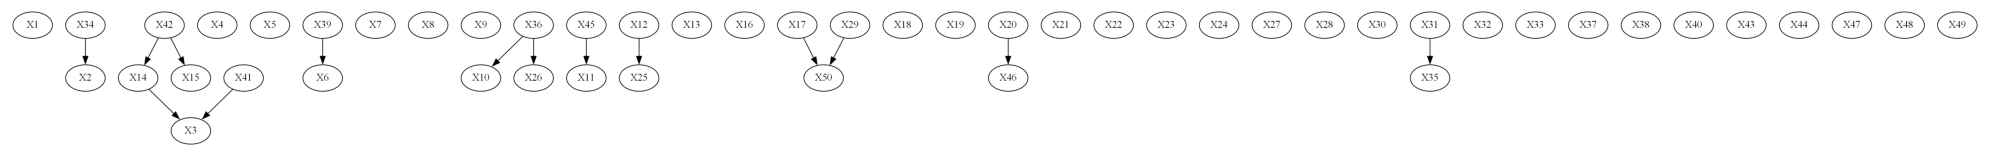

In [31]:
cluster_dag.true_dag.draw_pydot_graph()

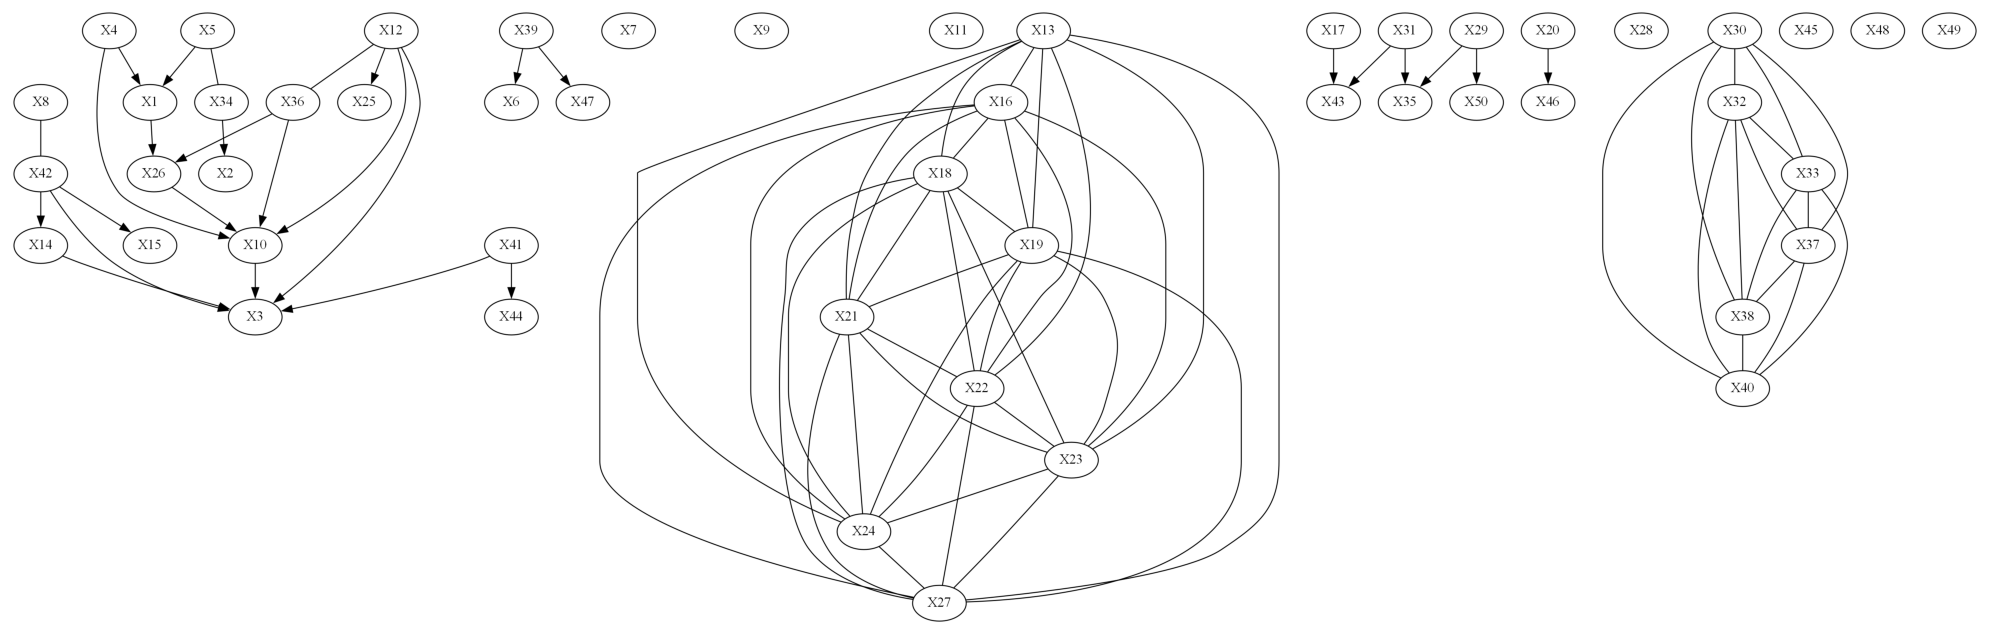

In [32]:
est_graph.draw_pydot_graph()